# Task 1.1 Data Preparation

## Summary 
In this section I have:
- **Loaded** the dataset as a dataframe using pandas
- Checked for and dropped **duplicates**
- Checked for **missing values**
- **Normalised** the dataset using MinMaxScaler
- Plotted columns before and after normalisation to ensure the values fall within the range 0-1 while maintaining the original shape

**Note:** Although the dataset is small, I decided to check for duplicates and missing values for fun and as part of best practice. I understand that addressing these issues in a dataset this small is unlikely to impact the quality of the model *greatly*.
- I found 1 duplicate row and no missing values. 

The dataset was successfully normalised as we can see in the **"After Normalisation"** graph:
- The range is now 0-1
- The shape is the same as the original plot (before normalisation)
  - This tells us that normalisation has been successful and the data was not distorted or altered by mistake


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

**Loading the Dataset**

In [4]:
data = pd.read_csv("glass_dataset.csv") #load dataset
print(data.head(5), "\n") #print first 5 rows to verify

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1 



**Checking for Duplicates and Missing Values**

In [6]:
print("Duplicate count : ",data.duplicated().sum(), "\n") #print number of duplicates
print("Duplicate rows: \n", data[data.duplicated(keep=False)], "\n") #print present duplicate rows
data = data.drop_duplicates() #drop duplicates from our set
print("Duplicate count after drop : ",data.duplicated().sum(), "\n") #print number of duplicates to verify

print("Missing count: ",data.isnull().sum().sum(), "\n") #calculate and print total sum of missing values

Duplicate count :  1 

Duplicate rows: 
          RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
38  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1 

Duplicate count after drop :  0 

Missing count:  0 



**Normalising the Dataset**

Before scaling RI       0.02278
Na       6.65000
Mg       4.49000
Al       3.21000
Si       5.60000
K        6.21000
Ca      10.76000
Ba       3.15000
Fe       0.51000
Type     6.00000
dtype: float64 



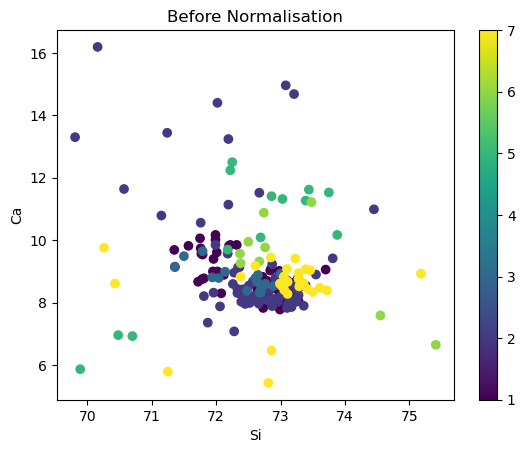

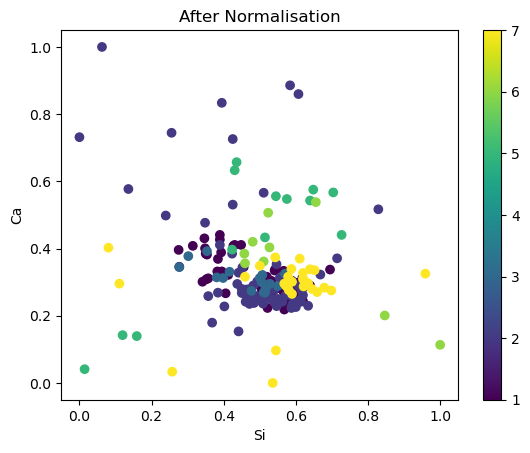

After scaling RI      1.0
Na      1.0
Mg      1.0
Al      1.0
Si      1.0
K       1.0
Ca      1.0
Ba      1.0
Fe      1.0
Type    6.0
dtype: float64


In [8]:
print("Before scaling", data.max() - data.min(), "\n") #print the range before scaling
inputs = data.drop(columns=["Type"]) #separate the inputs (glass features) from the targets (glass types) 
targets = data["Type"]  

#pick 2 columns to investigate normalisation effects with 
input_1 = "Si"
input_2 = "Ca"

# plot columns Si and Ca before normalisation with a scatter graph
plt.scatter(inputs[input_1] ,inputs[input_2],c = targets , cmap = "viridis" )
plt.colorbar()
plt.title("Before Normalisation")
plt.xlabel(input_1)
plt.ylabel(input_2)
plt.show()

scaler = MinMaxScaler()
scaled = scaler.fit_transform(inputs)
data = pd.DataFrame(scaled, columns=inputs.columns)
data["Type"] = targets.reset_index(drop=True)

# plot columns Si and Ca after normalisation with a scatter graph
plt.scatter(data[input_1], data[input_2], c=data["Type"], cmap="viridis")
plt.colorbar()
plt.title("After Normalisation")
plt.xlabel(input_1)
plt.ylabel(input_2)
plt.show()

#reassign inputs and targets after normalisation to be used in test train split 
inputs = data.drop(columns=["Type"])
targets = data["Type"]

print("After scaling", data.max() - data.min()) #print the range after scaling to further verify success 

# Task 1.2 Classification

In this section I have: 
- Split the normalised dataset into 4 parts using a **random seed** for reproducibility
  - X_train to train the model on inputs (glass features)
  - X_test to test the model on **unseen** inputs (glass features)
  - y_train to train the model on targets (types of glass)
  - y_test to test the model on targets (types of glass)

### **KNN**
- Used a loop to train a KNN Classifier with neighours ranging 1,20
- Plotted the accuracy score of each KNN(n) to assess the best model
- Predicted points using the best model we found, plotted the results using a confusion matrix

### **SVM**
- Used a loop to train a SVM Classifer with Kernel Shapes (Linear, Polynomial, Radial)
- Plotted the acuracy score of each SVM with different kernel shapes
- Predicted points using the best SVM model we found, plotted the results using a confusion matrix

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

**Split Dataset into Testing and Training Sets**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, stratify=targets, random_state=42)

**Investigate Optimal Number of Neighbours for KNN**

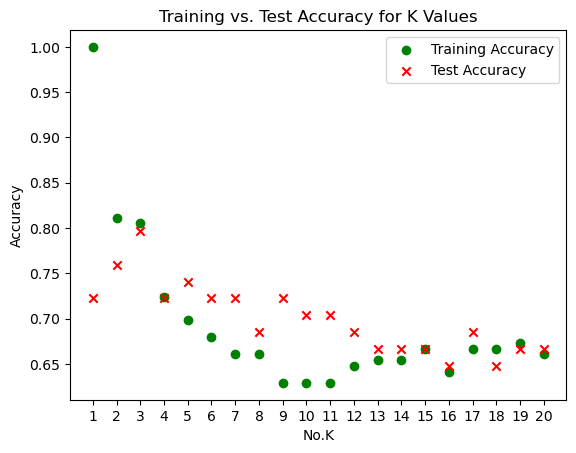

Best scoring K value: 3 with a test accuracy of 0.796

k=3 Training Accuracy: 0.805
k=3 Test Accuracy: 0.796


In [16]:
k_values = range(1, 21) 
k_train_score = [] 
k_test_score = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) #fit the model with the training data
    
    #calculate the model accuracy score on the training data, then on the unseen test data
    k_train_score.append(knn.score(X_train, y_train)) 
    k_test_score.append(knn.score(X_test, y_test)) 

best_k_test_score = max(k_test_score) #get the highest score on test sets 
best_k_value = k_values[k_test_score.index(best_k_test_score)] #get the k that scored the highest value


plt.figure()
plt.xlabel('No.K')
plt.ylabel('Accuracy')
plt.title("Training vs. Test Accuracy for K Values")
plt.scatter(k_values, k_train_score, color= 'green', label= "Training Accuracy")
plt.scatter(k_values, k_test_score, color ='red', label = "Test Accuracy", marker = "x")
plt.xticks(k_values)
plt.legend()
plt.show()
print(f"Best scoring K value: {best_k_value} with a test accuracy of {best_k_test_score:.3f}\n")
print(f"k=3 Training Accuracy: {k_train_score[2]:.3f}")
print(f"k=3 Test Accuracy: {k_test_score[2]:.3f}")


**Best KNN Discussion**

The best performance on the test set was k=1, however with the training accuracy of 1.00 and a significant drop in performance on the test data we can see clear signs of overfitting as the model cannot generalise.

The best performance overall was k3. It's training accuracy is 0.80 with a test accuracy only slightly lower at 0.79.

Beyond k=3 we start to see the accuracy scores for *both* training and test data lower, this is potential overfitting as the model is performing poorly on both sets of data. 

Due to k=3's performance on the test set giving the highest score **and** being only slightly lower than on the training set, I can confidently say the model generalises well as it is able to adapt when given new unseen data. 

**Investigate Optimal Kernel Shape for SVM**

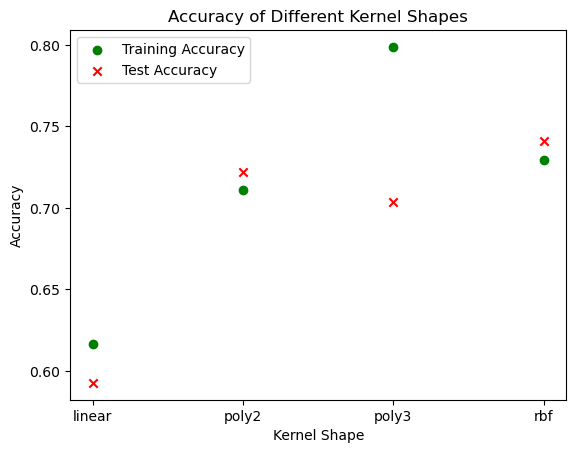

In [20]:
#evaluate optimal kernel shape for svm with train and test score 
s_train_score = []
s_test_score = []
kernel_shape =['linear', 'poly', 'rbf']
for s in kernel_shape:
    if s == 'poly': #if kernel shape is polynomial then limit search to degree 2,3
         for degree in [2,3]:
             svm = SVC(kernel=s, degree=degree)
             svm.fit(X_train, y_train)
             s_train_score.append(svm.score(X_train, y_train))
             s_test_score.append(svm.score(X_test, y_test))
             #print(f"Shape: {s}, degree {degree}, Train Accuracy: {s_train_score[-1]:.4f}, Test Accuracy: {s_test_score[-1]:.4f}")
    else:
        svm = SVC(kernel=s)
        svm.fit(X_train, y_train)
        s_train_score.append(svm.score(X_train, y_train))
        s_test_score.append(svm.score(X_test, y_test))
        #print(f"Shape: {s}, Train Accuracy: {s_train_score[-1]:.4f}, Test Accuracy: {s_test_score[-1]:.4f}")


# plot score performance for each kernel shape (linear, poly degree 2, poly degree 3, radial)
kernels = ['linear', 'poly2', 'poly3', 'rbf']
plt.figure()
plt.xlabel ("Kernel Shape")
plt.ylabel ("Accuracy")
plt.title("Accuracy of Different Kernel Shapes")
plt.scatter(kernels, s_train_score, color='green', label="Training Accuracy")
plt.scatter(kernels, s_test_score, color='red', label="Test Accuracy", marker= "x")
plt.legend()
plt.show()

**Best SVM Discussion** 

The radial kernel shape gave us the best test score, radials score 

**Predict Points with Best KNN Model**

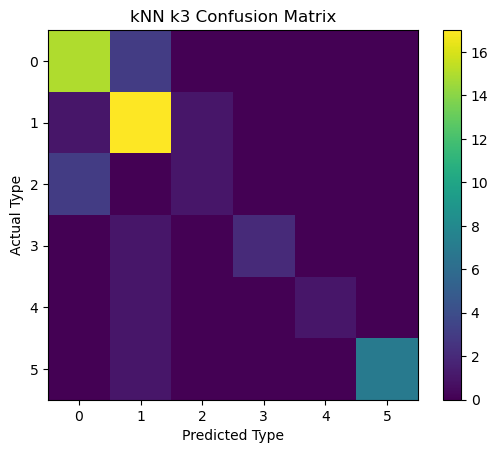

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64
Type
2    57
1    51
7    21
3    13
5    10
6     7
Name: count, dtype: int64
Type
2    19
1    18
7     8
3     4
5     3
6     2
Name: count, dtype: int64


In [24]:
#demonstrate knn can predict points (using our best k value) 
knn = KNeighborsClassifier(n_neighbors=best_k_value)  
knn.fit(X_train, y_train)
classifications = knn.predict (X_test)

knn_confusion = confusion_matrix (y_test, classifications)
plt.imshow(knn_confusion)
plt.colorbar()
plt.xlabel("Predicted Type")
plt.ylabel("Actual Type")
plt.title(f"kNN k{best_k_value} Confusion Matrix")
plt.show()

##maybe plot these with a bar chart so it's easier to read than print out?
##(can see that split uses stratify so the overall proportion of classes stays the same, model is trained on very imbalanced data) 
print(targets.value_counts()) #targets (glass types) present in set BEFORE split

#glass types present in training and test sets after split
print(y_train.value_counts())
print(y_test.value_counts())

**KNN Prediction Discussion**

From the above confusion matrix for our KNN, we can see that **not all values lie on the diagonal**, meaning the model is inaccurate. This is expected though as the dataset is **unbalanced**.

The most represented classes (glass types) are type 2, 1, and 7, we can see this reflected in the confusion matrix with type 2 being the most accurately predicted, with type 1 as a close second and type 7 not too far behind.

It is important to consider that KNN is a **lazy learner**, to put it simply, knn makes predictions based on the labels of it's nearest neighbours - because type 2 dominates the class distribution, more often than not those labels would be 2, leading the model to also predict 2 as statistically it has the highest chance of being correct. 

These findings strongly suggest that the model is currently performing much better on the classes it "sees" most, something sometimes called **training set bias** - where a model performs better for the well represented classes, but significantly worse for the less represented classes.

In conclusion, while the model *can* predict points, to improve it further I believe the classes should be evenly distributed before training the model - since lazy learners are predisposed to bias. This is something I will explore further in 1.3 Assessment of Classification.

**Predict Points with Best SVM Model**

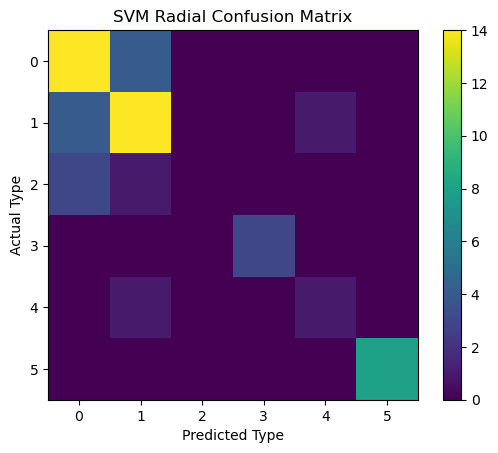

In [28]:
#demonstrate svm can predict points (using our best kernel shape) 
svm = SVC (kernel = 'rbf')  
svm.fit(X_train, y_train)
classifications = svm.predict (X_test)

svm_confusion = confusion_matrix (y_test, classifications)
plt.imshow(svm_confusion)
plt.colorbar()
plt.xlabel("Predicted Type")
plt.ylabel("Actual Type")
plt.title("SVM Radial Confusion Matrix")
plt.show()

**SVM Point Prediction Discussion**

From the above confusion matrix for our SVM, again we see that **not all values lie on the diagonal**, meaning the model is innacurate for reasons previously discussed.

We see similar patterns to the previous matrix shown, with type 2 being the most accurately predicted and type 1 and 7 not far behind - again we can see the model is often predicting type 2 (even when its wrong), but not quite as often as KNN did. 

Since SVM is considered an **eager learner** it does not suffer as much when it comes to imbalanced classes. This is because the model doesn't rely on the majority of nearby neighbours like KNN does - instead it draws a boundary between points with a maximised margin, and uses the points closet to or within the margin to support it's decisions, these are reffered to as "support vectors".

SVM can still suffer from class imbalance as underrepresented classes will likely have scarce support vectors due to a lack of points, this could mean that very few points lie close to the decision boundary - meaning predictions for said classes occur a less often (if at all). 

SVM still struggles with class imbalance, but less than the KNN as it does not rely on the majority label of it's neighbours, but instead on the data points it has deemed most relevant (lying closest to the boundary) 

We can see this reflected in the confusion matrix, as again we see lots of predictions being made for the top represented class, but it appears to be happen far less than with the KNN despite being trained on the same set.

**One interesting observation** is that our svm model **has not predicted type 3** a single time, despite it being present in the dataset. This suggests it's points were too far from the decision boundary, or potentially not contained within one at all. This is something I will explore more in 1.3


# Task 1.3 Assessment of Classification 

In this section I have: 
- Used K-Fold Cross Validation with 10 folds
- Computed the cross validation scores for both our best KNN and best SVM models found in the prev. task
- Plotted the results using a box plot

In [32]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

**Perform Cross Validation on the Best KNN and SVM Models**

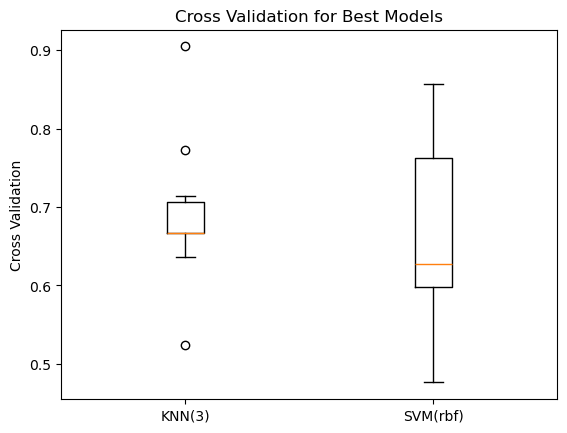

In [35]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

#cross validate knn with our best_k_value (3)
knn = KNeighborsClassifier(n_neighbors=best_k_value) 
knn_scores = cross_val_score(knn, inputs, targets, cv=k_folds)

#cross validate svm with our best shape (radial)
svm = SVC(kernel='rbf') 
svm_scores = cross_val_score(svm, inputs, targets, cv=k_folds)

#box plot for knn and svm accuracy scores 
plt.figure()
plt.title("Cross Validation for Best Models") 
plt.boxplot([ knn_scores,svm_scores])
plt.xticks( [1 , 2 ] , ["KNN(3)" , "SVM(rbf)"])
plt.ylabel("Cross Validation") 
plt.show()


**Summary of Results**

From our cross validation box plot, we can see that KNN has a higher median accuracy and a lower variance in accuracy (shown by the tigher box), despite having 3 outliers, we can say that KNN performed relatively consistently on different folds.

Constrastingly, SVM has a lower median accuracy and although it had no outliers, the variance in accuracy is much higher which suggests that SVMs performance fluctuated significantly through different folds.

KNN has maintained a relatively consistent accuracy through each fold due to the way it makes decisions, since it uses all neighbours to make predictions based on the majority "label" of those neighbours it does not fluctuate much at all.

SVM has not been consistent through folds, since it makes a new "model" for each fold this means the decision boundaries are redrawn based on the data it is given. Since the given data changes through out folds, the svm can deem certain data points more or less relevant than previous models and place them closer or further away from the boundary - leading to differnt decisions and accuracy scores for each fold since essentially the "rule set" has changed each time and only the points closest to the boundary (support vectors) are consulted in predictions (instead of all neighbours like in knn) the predicitons will vary greatly. 

This phenomenon is also an issue of the problem, identifying glass types is a multi class problem (multiple types of glass) with overlapping features (many types of glass likely share the same chemical makeup in some areas) this is not a problem that svm deals with well, nor knn. 

**Why?** 
 !!!! can see that this is happening, but why? why will tell us what the results truly mean and also support suspicions that although the models seem to be accurate it could be down to statisics based luck rather than true learning !! 

 things to explore: 
 - plot overlapping classes?
 - plot the boundaries our svm is making, why is it never predicting 3 even when present? Can provide insight into it's high variance 
 - could test the models again on a balanced set to understand more?
 - **why would knn have lots of outliers and svm doesnt?**
 - is the reason knn has outliers because it consults all neighbours (which are more often than not labeled 2 so will predict 2 most of the time even when wrong) and the reason svm has high variance but no outliers due to it consulting fewer points (only the support vectors) 


**in conclusion *probably* :**
While both our models are predicting points somewhat accurately, it is likely that this accuracy is somewhat "luck" based - meaning the models havent truly learned and aren't really able to distinguish different types of glass.
**probably because both models don't handle overlapping classes well, identifying types of glass is a multi classification problem (multiple types of glass exist as probable answers) - they also have overlapping features (many variations of glass will have similar chemical make ups in some or most areas , these are things that neither model can navigate well at all. 

**brainstorming notes**
knn is a bit more randomly lucky or unlucky resulting in massive drops and increases in accuracy, and svm uses fewer points to make predictions so even when it is wrong there is a pattern of wrongness because it has genuinely made some kind of effort to identify something rather than just taking the majority vote of its mates as gospel like knn does.


In [38]:
from sklearn.inspection import DecisionBoundaryDisplay

##plot svm decision boundary on 2 folds to see how the boundaries have changed 
##balance the set and plot a boundary again to see if it is more uniform and better able to classify points



# **Experimental Things With No Home Yet**

**Seeing variance maintained by each component**

No. of Components:  1  Variance:  0.43712744601449116
No. of Components:  2  Variance:  0.6236599940466734
No. of Components:  3  Variance:  0.7567659838798358
No. of Components:  4  Variance:  0.86661512032421
No. of Components:  5  Variance:  0.9289585995612497
No. of Components:  6  Variance:  0.9708978741930374
No. of Components:  7  Variance:  0.9951689509222392
No. of Components:  8  Variance:  0.999853508929956
No. of Components:  9  Variance:  1.0


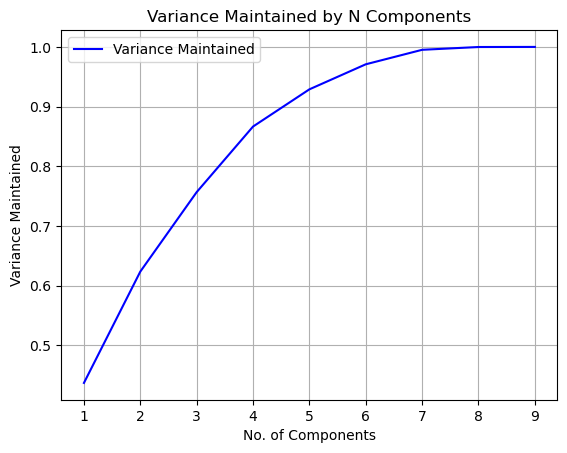

In [46]:
from sklearn.decomposition import PCA
#check for optimal pca components (maintain highest variance / sweet spot)
variance_result = []
pca_values = range(1, 10)  # testing pca from 1 - 9 dimensions

k_pca_train_score = []
k_pca_test_score = []

s_pca_train_score = []
s_pca_test_score = []

for p in pca_values:
    pca = PCA(n_components=p)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    variance_result.append(sum(pca.explained_variance_ratio_))
    print("No. of Components: ",p, " Variance: ", variance_result[p-1]) 

#plot scores
plt.figure()
plt.xlabel('No. of Components')
plt.ylabel('Variance Maintained')
plt.title("Variance Maintained by N Components")
plt.plot(pca_values, variance_result, color= 'blue', label= "Variance Maintained")
plt.xticks(pca_values)
plt.grid(True)
plt.legend()
plt.show()


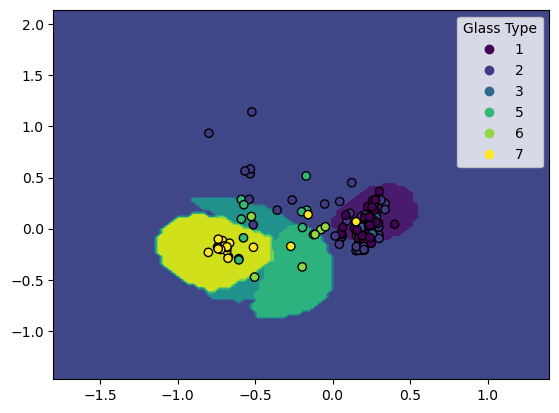

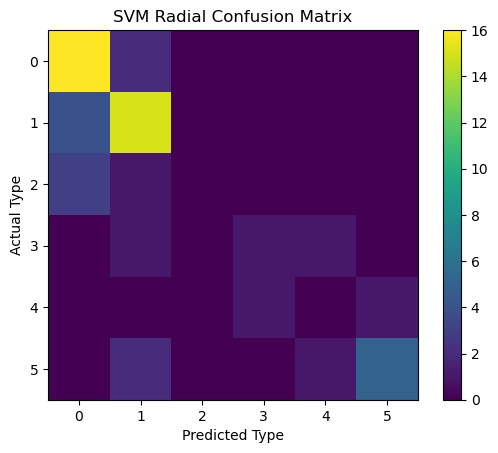

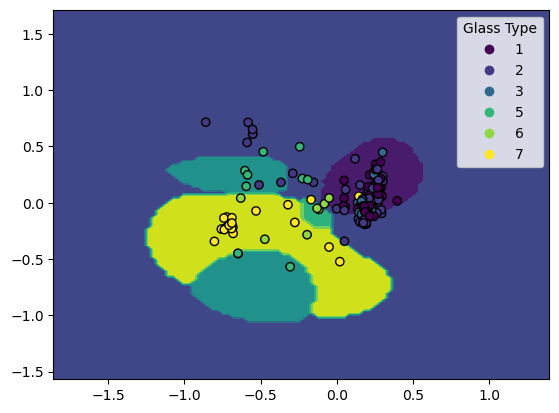

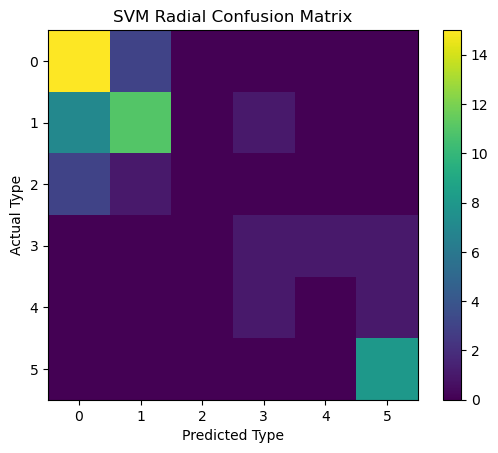

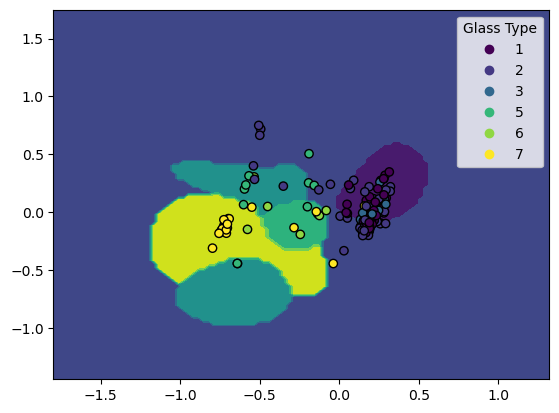

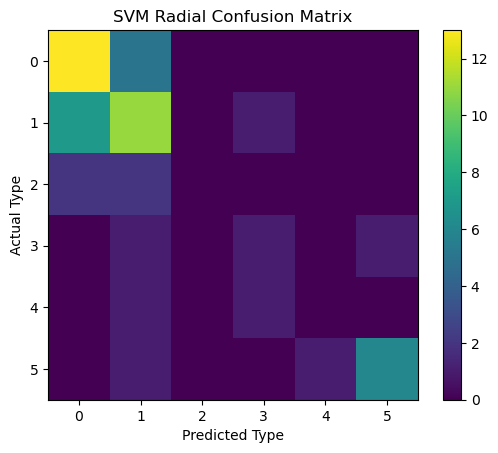

In [162]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_boundary():
    display = DecisionBoundaryDisplay.from_estimator(
        exp_svm,
        X_train_pca, 
        response_method="predict",
        #cmap = "Dark2",
    )
    points = display.ax_.scatter(
        X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor="black",
        #cmap = "Dark2"
    )
    
    handles, labels = points.legend_elements()
    display.ax_.legend(handles, labels, title="Glass Type")
    plt.show()

def plot_prediction():
    svm_confusion = confusion_matrix(y_test, classifications)
    plt.imshow(svm_confusion)
    plt.colorbar()
    plt.xlabel("Predicted Type")
    plt.ylabel("Actual Type")
    plt.title("SVM Radial Confusion Matrix")
    plt.show()

for r in [0,1,3]:
    X_train, X_test, y_train, y_test = train_test_split(inputs, targets, stratify=targets, random_state=r)
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    exp_svm = SVC(kernel='rbf') 
    exp_svm.fit(X_train_pca, y_train)
    classifications = exp_svm.predict (X_test_pca)
    plot_boundary()
    plot_prediction()


**thoughts** 

glass classes overlap a lot, leads to unclear and tightly arranged decision boundaries (confused and tangled) model also assigned massive boundary to type 2 (?) 

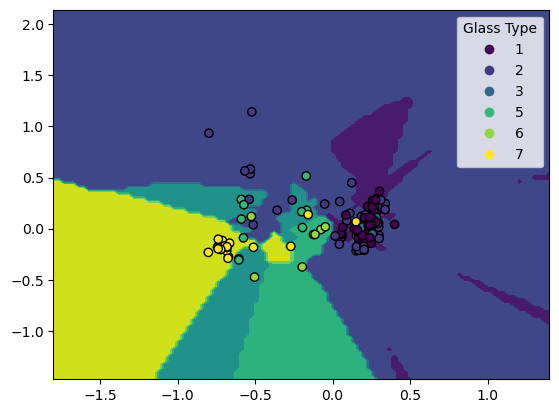

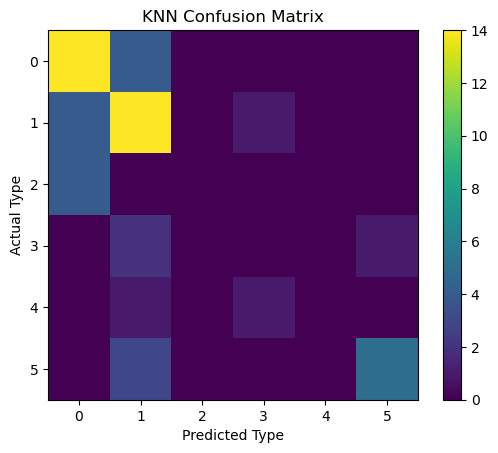

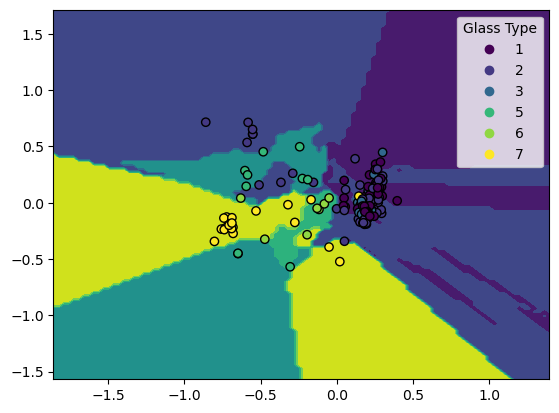

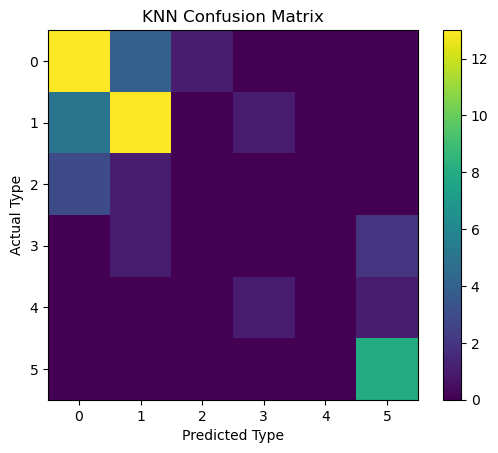

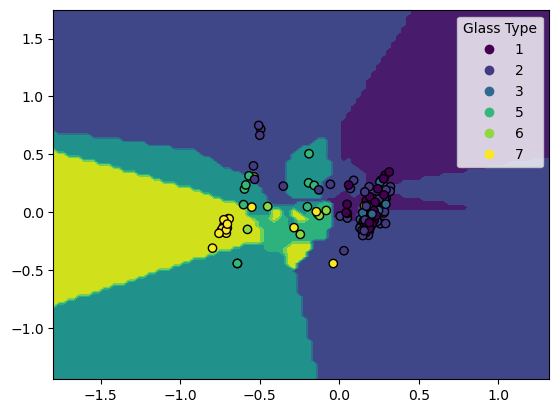

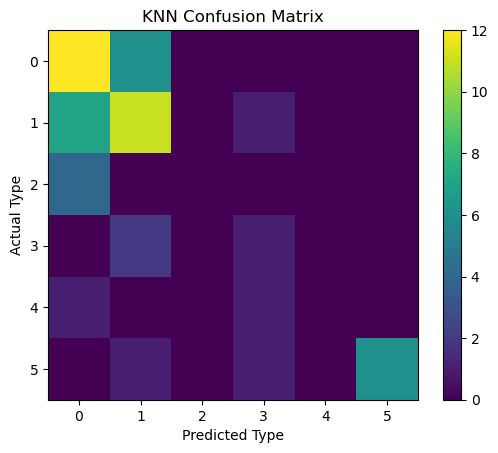

In [192]:
from sklearn.inspection import DecisionBoundaryDisplay

def plot_boundary():
    display = DecisionBoundaryDisplay.from_estimator(
        exp_knn,
        X_train_pca, 
        response_method="predict",
        #cmap = "Dark2",
    )
    points = display.ax_.scatter(
        X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor="black",
        #cmap = "Dark2"
    )
    
    handles, labels = points.legend_elements()
    display.ax_.legend(handles, labels, title="Glass Type")
    plt.show()

def plot_prediction():
    knn_confusion = confusion_matrix(y_test, classifications)
    plt.imshow(knn_confusion)
    plt.colorbar()
    plt.xlabel("Predicted Type")
    plt.ylabel("Actual Type")
    plt.title("KNN Confusion Matrix")
    plt.show()

for r in [0,1,3]:
    X_train, X_test, y_train, y_test = train_test_split(inputs, targets, stratify=targets, random_state=r)
    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    exp_knn = KNeighborsClassifier(n_neighbors=3) 
    exp_knn.fit(X_train_pca, y_train)
    classifications = exp_knn.predict (X_test_pca)
    plot_boundary()
    plot_prediction()
